Load all packages you need.

In [5]:
import pandas as pd

Read the data.

In [7]:
# CSV-Datei laden
import pandas as pd
df = pd.read_csv("/Users/davidsuss/Documents/GitHub/Applied-Analytics/data/diabetes.csv")

Create an overview of the dataframe (variable names and types; number of observations). What is the target variable? 

In [8]:
# Erste Zeilen anzeigen
print(df.head())

# Datentypen jeder Spalte anzeigen
print("\nDatentypen der Spalten:")
print(df.dtypes)
print("\nnumber of observations:")
print(df.shape[0])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Datentypen der Spalten:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                       

Create a histogram of the variable "BloodPressure".

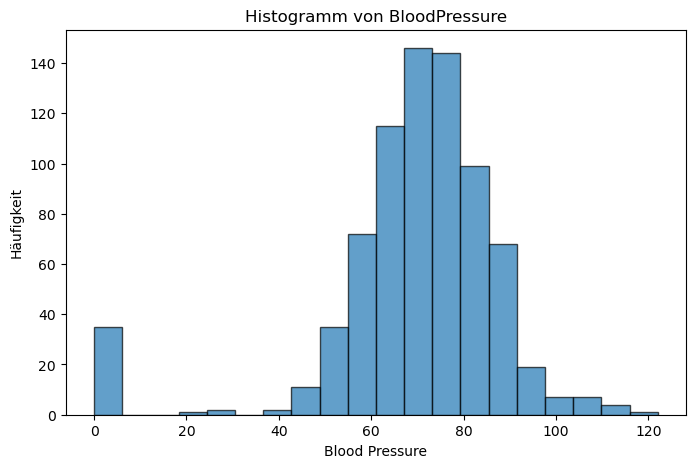

In [9]:
import matplotlib.pyplot as plt

# Histogramm für die Variable BloodPressure
plt.figure(figsize=(8, 5))
plt.hist(df['BloodPressure'], bins=20, edgecolor='black', alpha=0.7)

# Titel und Achsenbeschriftung
plt.title('Histogramm von BloodPressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Häufigkeit')

# Diagramm anzeigen
plt.show()


Create a scatterplot of the variables "BloodPressure" and "BMI"

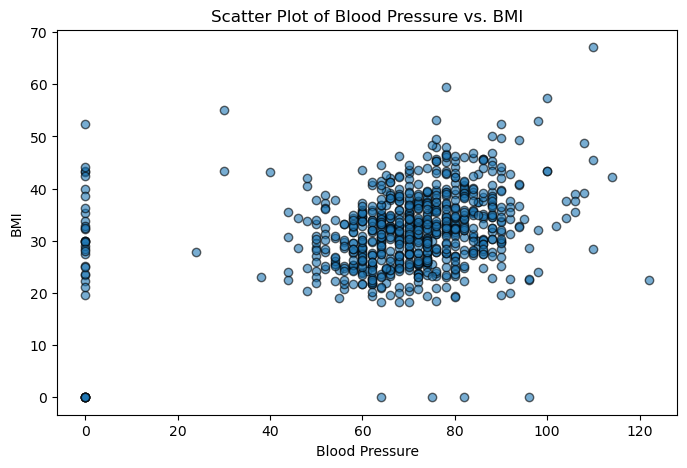

In [10]:
# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['BloodPressure'], df['BMI'], alpha=0.6, edgecolors='black')

# Labels and title
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.title('Scatter Plot of Blood Pressure vs. BMI')

# Show plot
plt.show()

Run sweetviz on the dataset and inspect it.

In [11]:
conda install -c conda-forge sweetviz ydata-profiling

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - sweetviz
    - ydata-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ydata-profiling-4.14.0     |     pyhd8ed1ab_0         186 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         186 KB

The following packages will be UPDATED:

  ydata-profiling                       4.12.2-pyhd8ed1ab_0 --> 4.14.0-pyhd8ed1ab_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
from ydata_profiling import ProfileReport

# Erstelle eine Kopie des DataFrames zur Bereinigung
df_cleaned = df.copy()

# Boolean-Spalten identifizieren
bool_columns = df_cleaned.select_dtypes(include=["boolean"]).columns

# Ersetze fehlende Werte in Boolean-Spalten mit False
df_cleaned[bool_columns] = df_cleaned[bool_columns].fillna(False).astype(bool)

# Falls weiterhin Probleme auftreten, konvertiere Boolean-Spalten in Integer
df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)

# Generiere den YData-Profiling-Report
profile = ProfileReport(df_cleaned, explorative=True)

# Speichere den Report als HTML
profile.to_file("ydata_profiling_report.html")

print("✅ Der YData Profiling Report wurde erfolgreich als 'ydata_profiling_report.html' gespeichert.")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Der YData Profiling Report wurde erfolgreich als 'ydata_profiling_report.html' gespeichert.
